# Comprehensive Stock Market Analysis of Major Tech Companies

## Project Overview

In this project, I performed a detailed analysis of the stock market performance of four leading technology companies: Apple (AAPL), Amazon (AMZN), Google (GOOG), and Microsoft (MSFT) over a five-year period from 2013 to 2018. The goal was to gain insights into the market trends, compare the growth trajectories and understand the factors influencing stock price movements.


### 1. Data Collection

To start the analysis, I collected stock data for the chosen companies over the specified time period.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.1 Data Sourcing

The dataset comprises CSV files, each containing daily stock data for various companies over five years. Initially, I identified the files relevant to our analysis.

In [2]:
import glob

# Checking the number of files available in the dataset
total_files = len(glob.glob(r'D:\\Project\\Stock_Market_Analysis\\Stocks_5Year_Dataset\\*csv'))
print(f"Total number of files in the dataset: {total_files}")

Total number of files in the dataset: 509


#### 1.2 Company Selection

I selected four prominent companies known for their significant impact on the technology sector. The selection was based on market capitalization, innovation leadership, and historical stock performance.

#### 1.3 Data Compilation

Instead of using concat(), which I previously used in a similar case study, I employed the append() method from pandas to merge the datasets for these companies. This approach allowed me to explore the differences between these methods and ensure the flexibility of my data handling skills.

In [3]:
company_list = [
    r'D:\\Project\\Stock_Market_Analysis\\Stocks_5Year_Dataset\\AAPL_data.csv' , 
    r'D:\\Project\\Stock_Market_Analysis\\Stocks_5Year_Dataset\\AMZN_data.csv' , 
    r'D:\\Project\\Stock_Market_Analysis\\Stocks_5Year_Dataset\\GOOG_data.csv' , 
    r'D:\\Project\\Stock_Market_Analysis\\Stocks_5Year_Dataset\\MSFT_data.csv'
]

#### 1.3 Data Compilation

In [4]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
# Creating an empty DataFrame to store all data
all_data = pd.DataFrame()

In [6]:
# Looping through each selected company's CSV file and appending the data
for file in company_list:
    
    current_df = pd.read_csv(file)
    
    all_data = pd.concat([all_data, current_df], ignore_index=True)

In [7]:
# Verifying the dimensions of the compiled data
print(f"Data Dimensions: {all_data.shape}")

Data Dimensions: (4752, 7)


#### 1.4 Data Preview

After successfully merging the datasets, I inspected the first few rows to ensure the data was correctly compiled.

In [8]:
all_data.head(6)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL


### 2. Analyzing the Change in Stock Prices Over Time

Understanding how stock prices fluctuate over time is essential for assessing market trends and making informed investment decisions. In this section, I analyze the historical price movements of the selected companies to identify patterns and potential correlations.

#### 2.1 Data Quality Check

Before proceeding with the analysis, I ensured that the dataset was clean and ready for time series analysis. This involved checking for any missing values and verifying the data types of each column.

In [9]:
# Checking for missing values in the dataset
missing_values = all_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64


In [10]:
# Verifying data types of all columns
data_types = all_data.dtypes
print("Data Types:\n", data_types)

Data Types:
 date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object


#### 2.2 Data Transformation

Converting the 'date' column to a datetime object was crucial for performing time series analysis and visualizing trends over time.

In [11]:
# Converting the 'date' column to datetime format
all_data['date'] = pd.to_datetime(all_data['date'])

# Confirming the conversion
print(all_data['date'].head())

0   2013-02-08
1   2013-02-11
2   2013-02-12
3   2013-02-13
4   2013-02-14
Name: date, dtype: datetime64[ns]


#### 2.3 Visualizing Stock Price Trends

To explore the historical performance of each company, I created line plots that display the closing prices over time. This visualization helps in identifying trends, volatility, and periods of significant price changes.

In [12]:
# Extracting the unique list of companies
tech_list = all_data['Name'].unique()
print("Tech Companies Included:", tech_list)

Tech Companies Included: ['AAPL' 'AMZN' 'GOOG' 'MSFT']


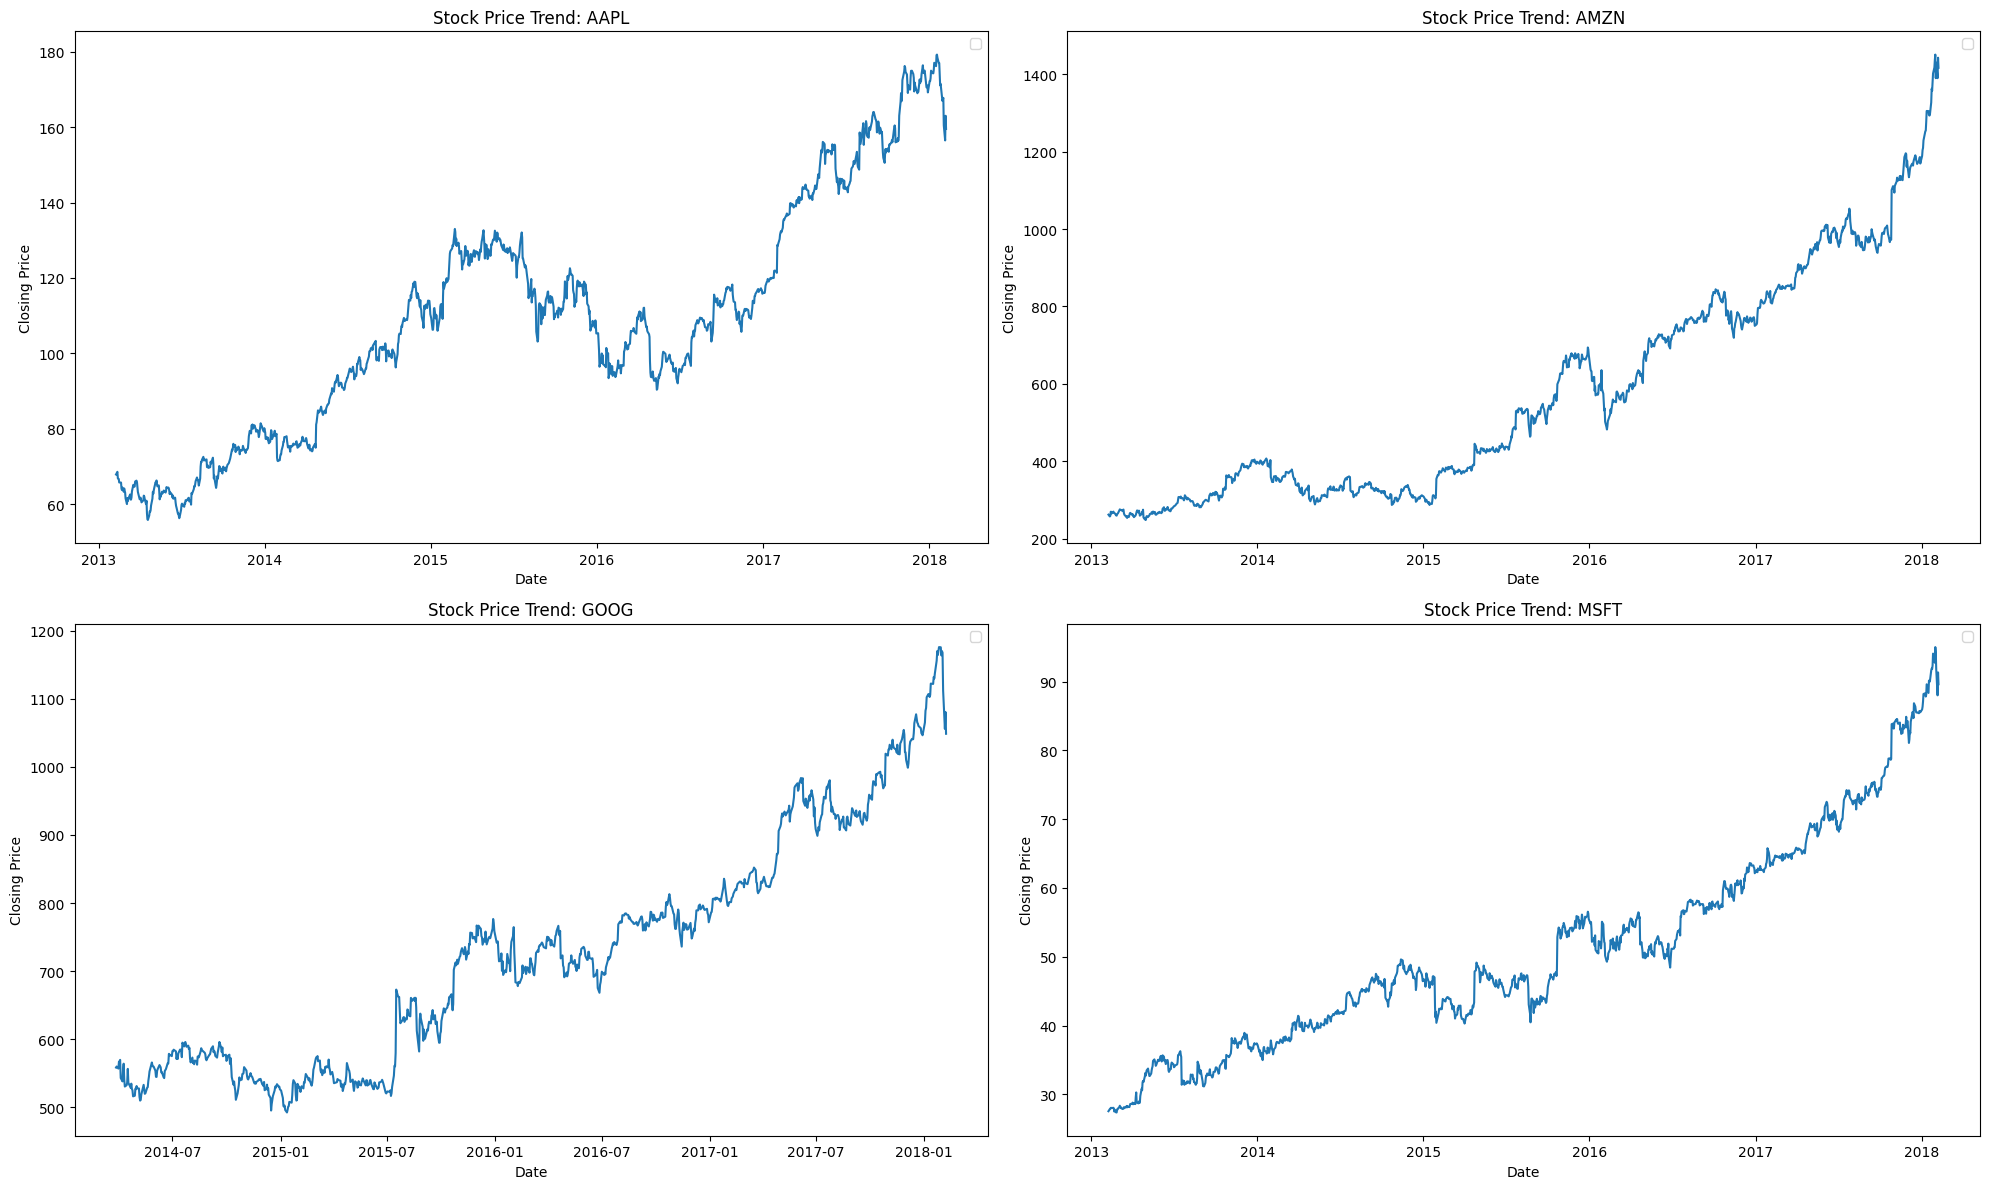

In [13]:
plt.figure(figsize=(20,12))

for index , company in enumerate(tech_list , 1):
    plt.subplot(2 , 2 , index) ## creating subplot for each stock
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    plt.plot(df['date'] , df['close']) ## plotting "date" vs "close"
    plt.title(f"Stock Price Trend: {company}")
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
plt.tight_layout()
plt.show()

#### 2.4 Key Observations and Insights

- **AAPL:** Apple's stock showed steady growth with notable peaks and occasional dips, reflecting the company's product launches and market strategies.
- **AMZN:** Amazon's stock price exhibited consistent upward momentum, indicating strong market confidence and expansion in various business verticals.
- **GOOG:** Google (Alphabet) had relatively stable growth, with certain periods of volatility possibly linked to market changes or corporate restructuring.
- **MSFT:** Microsoft's stock displayed a gradual rise, particularly in later years, which may correlate with the company's shift towards cloud computing and enterprise services.


### 3. Analyzing the Moving Averages of Various Stocks

Moving averages are a crucial tool in time series analysis, particularly in the stock market, where they help smooth out price data and highlight underlying trends. In this section, I calculated and analyzed moving averages for different window periods (10, 20, and 50 days) to understand the short-term and long-term trends of the selected tech companies.

#### 3.1 Exploring the Initial Data

Before calculating the moving averages, I took a closer look at the first few rows of the dataset to ensure that the data was properly structured and ready for further analysis.

In [14]:
all_data.head(15)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL
7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL
8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL
9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL


#### 3.2 Calculating Moving Averages

The moving average is a simple yet powerful tool that calculates the average closing price over a specific number of days (the window). This method helps in reducing noise and identifying the direction of the trend.

I started by calculating a 10-day moving average to observe short-term trends.

In [15]:
# Calculating the 10-day moving average
all_data['close'].rolling(window=10).mean().head(14)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
Name: close, dtype: float64

As expected, the first few values are NaN because the moving average cannot be calculated until the window is fully populated with data.

#### 3.3 Applying Multiple Moving Averages

To get a more comprehensive view, I calculated moving averages over 10, 20, and 50 days. These different window periods allow us to compare short-term, medium-term, and longer-term trends.

In [16]:
# Creating a copy of the dataset to store moving averages
new_data = all_data.copy()

In [17]:
# Defining the moving average windows
ma_day = [10, 20, 50]

# Calculating moving averages for each window
for ma in ma_day:
    new_data['close_' + str(ma)] = new_data['close'].rolling(ma).mean()

In [18]:
# Displaying the last few rows to inspect the results
new_data.tail(7)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4745,2018-01-30,93.30,93.660,92.1000,92.74,38635053,MSFT,91.862,89.8285,86.5244
4746,2018-01-31,93.75,95.400,93.5100,95.01,48756338,MSFT,92.349,90.2815,86.7606
4747,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
4748,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
4749,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
4750,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
4751,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


#### 3.4 Setting the Date as the Index

For easier visualization and analysis, I set the 'date' column as the index. This allows for more straightforward time series plotting.

In [19]:
# Setting 'date' as the index
new_data.set_index('date', inplace=True)
new_data.head()

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN


#### 3.5 Visualizing Moving Averages

To visualize the moving averages, I plotted them alongside the stock prices. This helps in understanding how the stock has performed over different time frames and in identifying key trends and potential buy/sell signals.

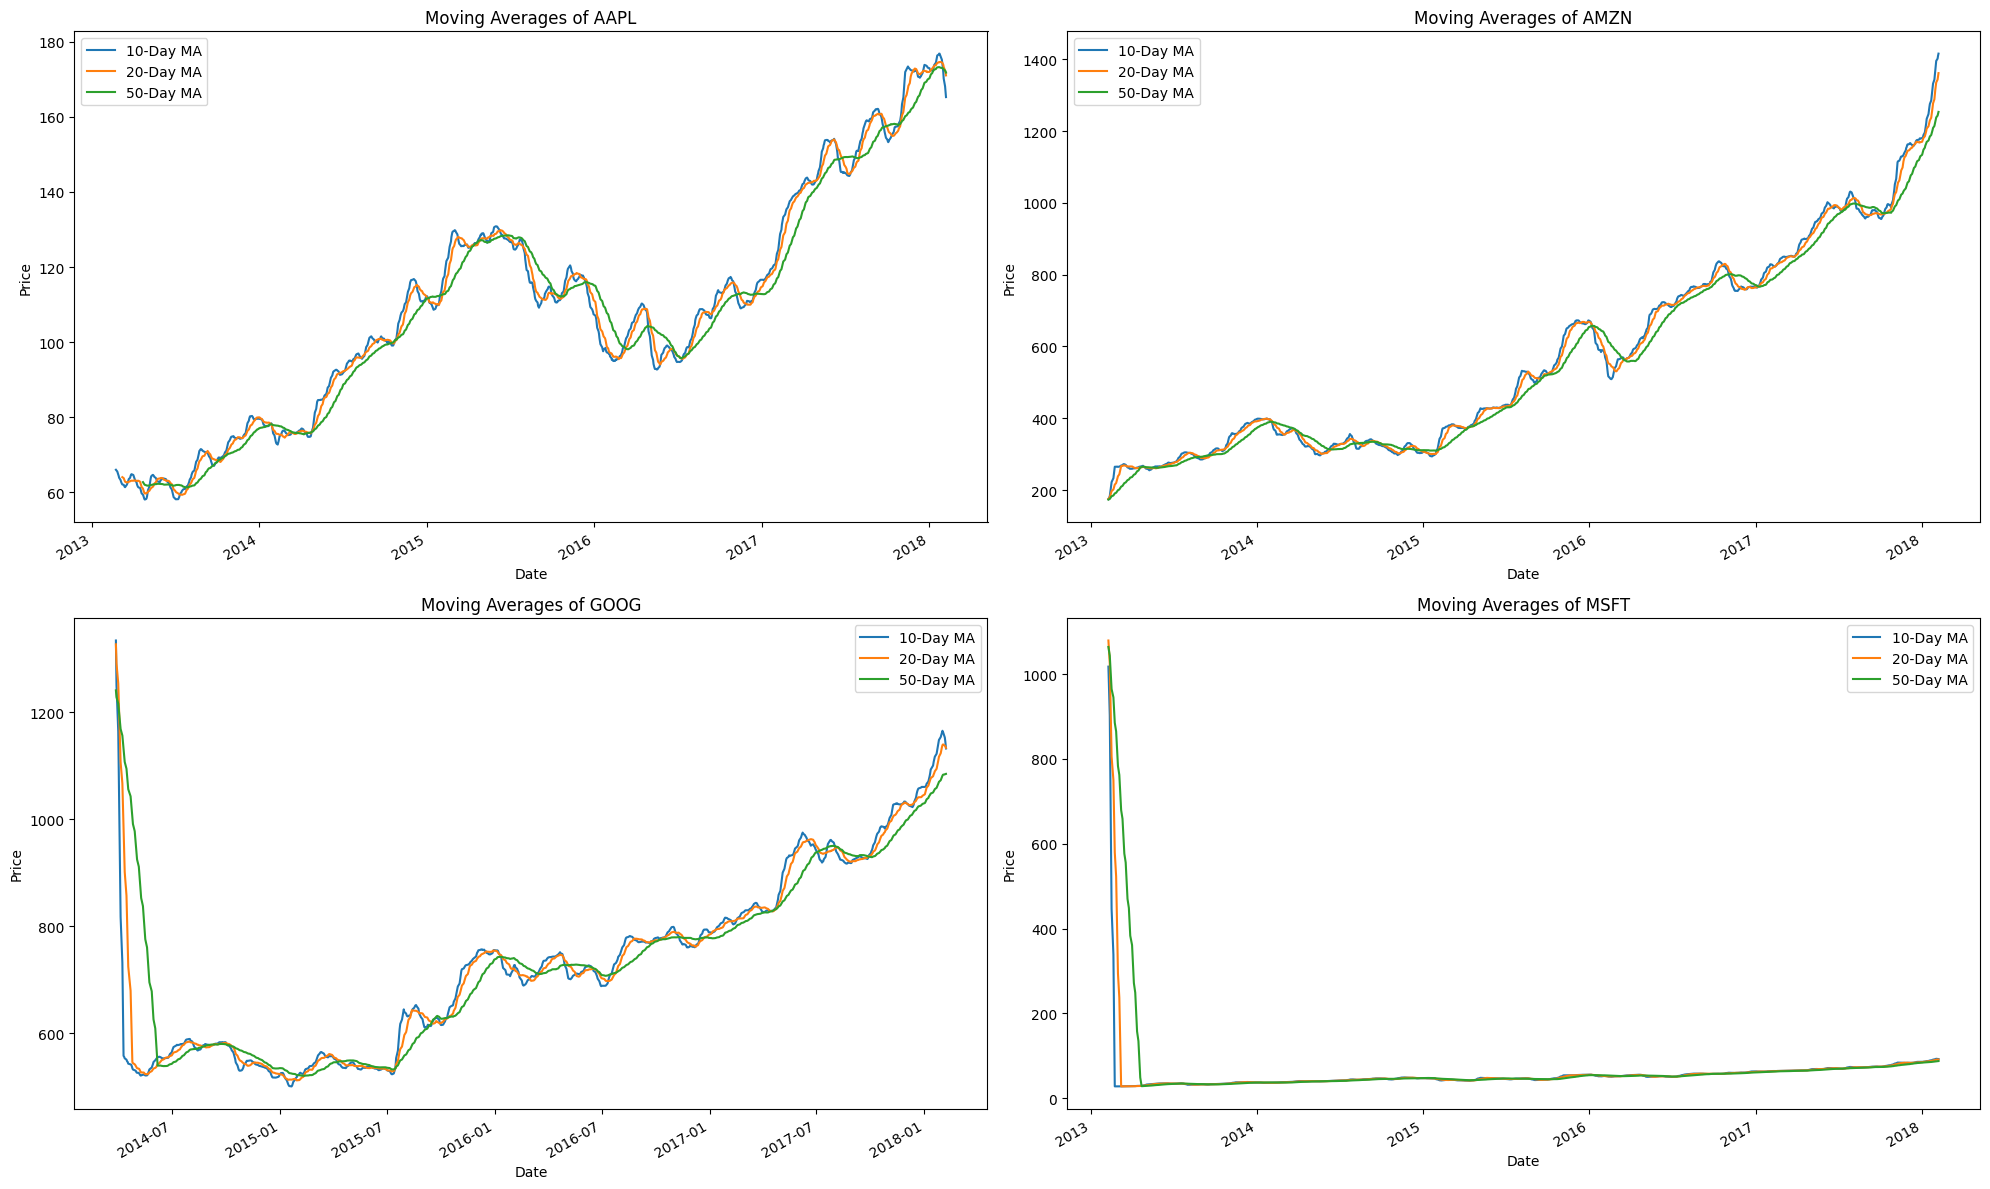

In [20]:
plt.figure(figsize=(20,12))

for index , company in enumerate(tech_list , 1):
    plt.subplot(2 , 2 , index)
    filter1 = new_data['Name']==company
    df = new_data[filter1]
    df[['close_10','close_20', 'close_50']].plot(ax=plt.gca())
    plt.title(f"Moving Averages of {company}")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(['10-Day MA', '20-Day MA', '50-Day MA'])
plt.tight_layout()
plt.show()

The plot above illustrates the 10-day, 20-day, and 50-day moving averages for each of the selected companies.

#### Key Observations:

- **10-Day Moving Average:** This short-term indicator is more sensitive to price changes, making it useful for capturing immediate market reactions. It is especially helpful for short-term traders.
- **20-Day Moving Average:** A slightly longer window smooths out more of the short-term volatility, providing a clearer view of the general direction over the last month.
- **50-Day Moving Average:** This long-term indicator helps in identifying the overall trend and is often used by long-term investors to make decisions.


### 4. Analyzing the Daily Closing Price Change of Apple Stock

Understanding daily stock returns is crucial for investors looking to assess the volatility and performance of a stock over time. In this section, I focused on Apple's stock to calculate and analyze its daily returns over the five-year period.

#### 4.1 Introduction to Daily Stock Returns

The daily return of a stock is a measure of how much the stock's price changes from one day to the next. It is a key indicator of the stock's volatility and can provide insights into market sentiment and potential risks.

**Daily Stock Return Formula:**

To calculate the daily return, we use the following formula:

$$
\text{Daily Return (\%)} = \frac{\text{Close Price Today} - \text{Close Price Yesterday}}{\text{Close Price Yesterday}} \times 100
$$

This formula gives the percentage change in the closing price from one day to the next, allowing us to quantify how much the stock price fluctuated.

#### 4.2 Loading the Apple Stock Data

To conduct this analysis, I first loaded the dataset containing Apple’s stock price data.


In [21]:
# Loading the Apple stock data
apple = pd.read_csv(r'D:\\Project\\Stock_Market_Analysis\\Stocks_5Year_Dataset\\AAPL_data.csv')

In [22]:
# Displaying the first few rows to inspect the data
apple.head(4)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL


#### 4.3 Calculating Daily Returns

Using the formula discussed, I calculated the daily percentage return for Apple's stock. This metric is essential for understanding the day-to-day price movements and for identifying periods of high volatility.

In [23]:
# Calculating the daily return percentage
apple['Daily return(in %)'] = apple['close'].pct_change() * 100
# Displaying the first few rows to check the calculation
apple.head(4)

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


#### 4.4 Visualizing Daily Returns

To better understand the fluctuations in Apple’s stock price, I created a line plot of the daily return percentages over time. This visualization helps in identifying trends, spikes, and periods of unusual market activity.

In [24]:
# Importing Plotly for interactive plotting
import plotly.express as px

In [25]:
# Plotting the daily return percentage over time
px.line(apple, x="date", y="Daily return(in %)", title="Apple Stock Daily Returns (%)")

#### 4.5 Key Observations

- **Volatility**: The plot shows periods of significant volatility, where daily returns varied widely. These periods could correlate with market events, product launches, or broader economic factors.

- **Trends**: By examining the plot, one can identify periods of consistent gains or losses, which may suggest trends in investor sentiment or market confidence in Apple's stock.

- **Spikes**: Sharp spikes in daily returns often indicate major news events or earnings reports that significantly impacted Apple's stock price.


### 5. Resampling Analysis of Apple's Closing Price

Resampling is a powerful technique in time series analysis that allows us to observe trends at different granularities by aggregating data over specified intervals. This analysis is particularly useful for understanding the long-term trends and seasonal patterns in stock prices.

#### 5.1 Introduction to Resampling

Resampling involves changing the frequency of time-series data to a new interval, such as daily, weekly, monthly, or yearly. By resampling Apple's closing price data, we can gain insights into how the stock performed over different periods and identify any underlying trends or patterns.

Before performing resampling, it's essential to ensure that the date column is set as the DataFrame’s index, as this enables the time-based operations required for resampling.

In [26]:
# Check the data types of each column to ensure 'date' is in the correct format
apple.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily return(in %)    float64
dtype: object

In [27]:
# Convert 'date' column to datetime format if it's not already
apple['date'] = pd.to_datetime(apple['date'])

In [28]:
# Set the 'date' column as the DataFrame index
apple.set_index('date', inplace=True)

#### 5.2 Resampling by Different Frequencies

We can resample Apple's closing price data by various frequencies to analyze its performance over different time intervals.

##### Monthly Resampling

Aggregates the closing prices by month and calculates the mean for each month.

In [29]:
# Resample data on a monthly basis and calculate the mean closing price
monthly_mean = apple['close'].resample('M').mean()

<Axes: title={'center': 'Monthly Average Closing Price'}, xlabel='date'>

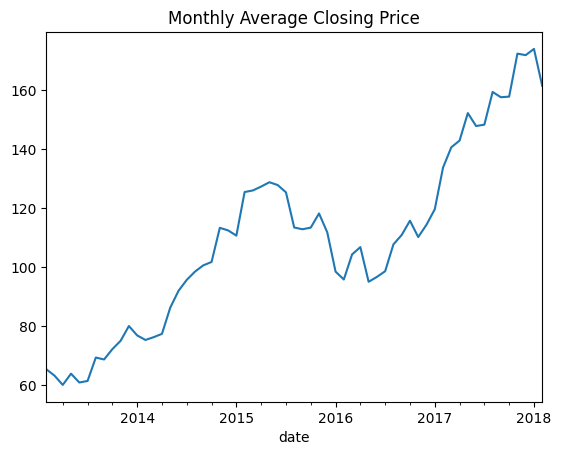

In [30]:
# Plot the monthly mean closing prices
monthly_mean.plot(title='Monthly Average Closing Price')

Key Observation: The monthly resampling plot reveals the seasonal fluctuations and trends in Apple's stock price, such as periods of steady growth or decline over several months.

#### Yearly Resampling

Provides a broader view of the stock's performance by averaging the closing prices for each year.

In [31]:
# Resample data on a yearly basis and calculate the mean closing price
yearly_mean = apple['close'].resample('Y').mean()

<Axes: title={'center': 'Yearly Average Closing Price'}, xlabel='date'>

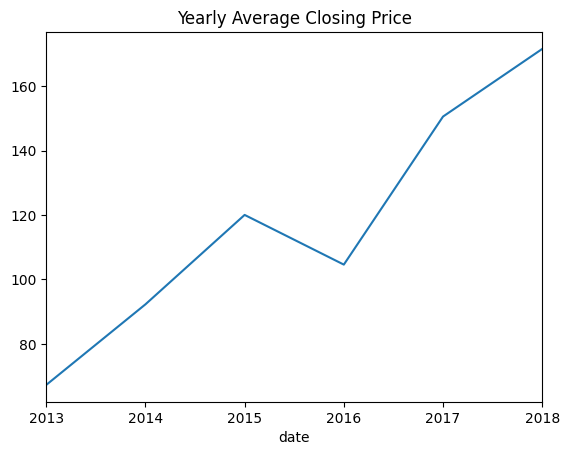

In [32]:
# Plot the yearly mean closing prices
yearly_mean.plot(title='Yearly Average Closing Price')

Key Observation: The yearly resampling highlights the long-term growth of Apple's stock, showing how the average closing price has increased year over year.

#### Quarterly Resampling

Captures the stock's performance over each quarter, which can be useful for understanding the impact of quarterly earnings reports or market events.

In [33]:
# Resample data on a quarterly basis and calculate the mean closing price
quarterly_mean = apple['close'].resample('Q').mean()

<Axes: title={'center': 'Quarterly Average Closing Price'}, xlabel='date'>

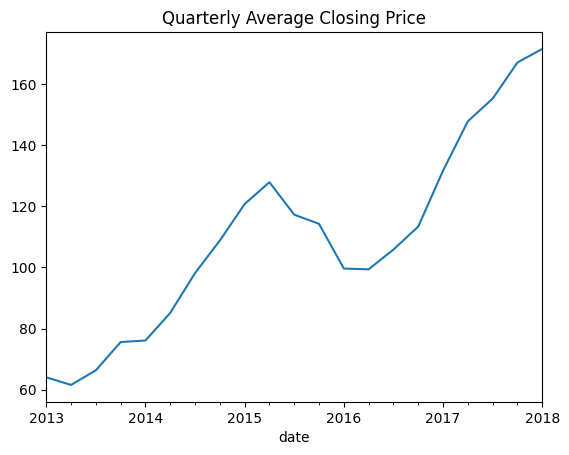

In [34]:
# Plot the quarterly mean closing prices
quarterly_mean.plot(title='Quarterly Average Closing Price')

Key Observation: The quarterly resampling plot may show more granular fluctuations compared to yearly resampling, making it easier to spot short-term trends or shifts in investor sentiment during specific quarters.

### 6. Analyzing Correlation Between Closing Prices of Major Tech Companies

In this section, I analyzed whether the closing prices of four major tech companies—Apple, Amazon, Google, and Microsoft—are correlated. Understanding these correlations can provide insights into how these companies' stock prices move in relation to each other, which is valuable for portfolio diversification and risk management.

#### 6.1 Loading and Preparing the Data

First, I loaded the closing price data for each company and compiled it into a single DataFrame for analysis.

In [35]:
company_list[0]

'D:\\\\Project\\\\Stock_Market_Analysis\\\\Stocks_5Year_Dataset\\\\AAPL_data.csv'

In [36]:
# Load the stock price data for each company
app = pd.read_csv(r'D:\\Project\\Stock_Market_Analysis\\Stocks_5Year_Dataset\\AAPL_data.csv')
amzn = pd.read_csv(r'D:\\Project\\Stock_Market_Analysis\\Stocks_5Year_Dataset\\AMZN_data.csv')
google = pd.read_csv(r'D:\\Project\\Stock_Market_Analysis\\Stocks_5Year_Dataset\\GOOG_data.csv')
msft = pd.read_csv(r'D:\\Project\\Stock_Market_Analysis\\Stocks_5Year_Dataset\\MSFT_data.csv')

In [37]:
# Create a DataFrame containing the closing prices of all companies
closing_price = pd.DataFrame({
    'apple_close': app['close'],
    'amzn_close': amzn['close'],
    'goog_close': google['close'],
    'msft_close': msft['close']
})

In [38]:
closing_price

,apple_close,amzn_close,goog_close,msft_close
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


#### 6.2 Visualizing the Relationships

To explore the relationships between the closing prices of these tech stocks, I used pair plots and a correlation heatmap.

##### Pair Plot:
The pair plot visualizes scatter plots of closing prices for every pair of companies. It also includes histograms on the diagonal to show the distribution of closing prices for each company.

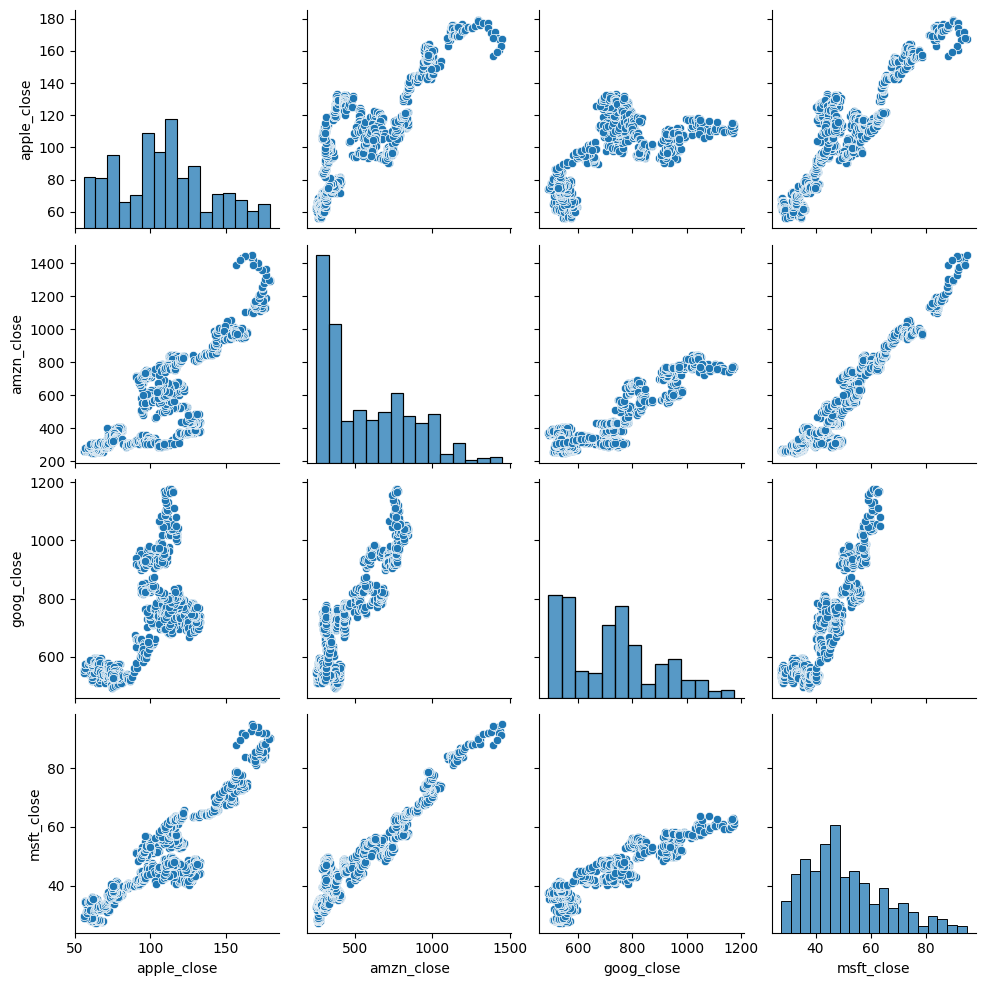

In [39]:
import seaborn as sns

# Generate a pair plot to visualize the relationships between the closing prices
sns.pairplot(closing_price)

##### Correlation Heatmap:
The heatmap shows the correlation matrix of closing prices. The correlation coefficient ranges from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

In [40]:
# Compute the correlation matrix
correlation_matrix = closing_price.corr()

<Axes: >

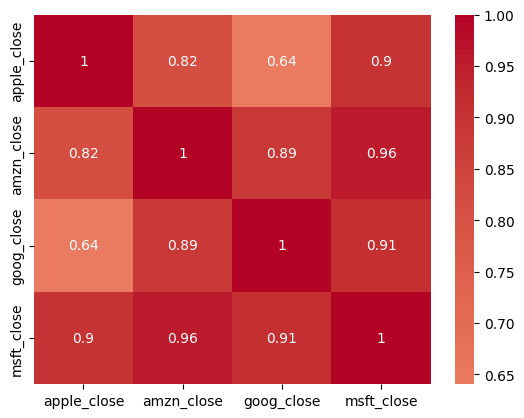

In [41]:
# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

### 6.3 Insights and Conclusions

- **Correlation Findings:**
    - The heatmap reveals that the closing prices of Google and Microsoft are highly correlated.
    - The correlation between Amazon and Microsoft is very strong at 0.96, indicating a near-perfect positive relationship between their closing prices.
    - Other correlations, while positive, are less pronounced.

- **Interpretation:**
    - A high correlation between stocks like Amazon and Microsoft suggests that their prices often move in tandem, which could be due to similar market conditions or sector-specific influences.
    - Understanding these correlations can help investors make more informed decisions about diversifying their portfolios and managing risk.


## 7. Analyzing Correlation Between Daily Changes in Closing Prices and Daily Returns

In this section, we will investigate whether the daily percentage changes in the closing prices of stocks are correlated across the four major tech companies: Apple, Amazon, Google, and Microsoft. This analysis helps us understand if the daily movements in stock prices for these companies are related, which can be important for trading strategies and portfolio management.

### 7.1 Calculating Daily Percentage Changes

First, we calculate the daily percentage change for each company's stock. The percentage change is computed using the formula:

$$
\text{Percentage Change} = \frac{\text{Current Price} - \text{Previous Price}}{\text{Previous Price}} \times 100
$$

Here’s how we compute it for Apple:

In [42]:
# Calculate daily percentage change for each stock
for col in closing_price.columns:
    closing_price[col + '_pct_change'] = (closing_price[col] - closing_price[col].shift(1)) / closing_price[col].shift(1) * 100

In [43]:
# Display the new DataFrame with percentage changes
closing_price

,apple_close,amzn_close,goog_close,msft_close,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
0,67.8542,261.95,558.46,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,559.99,27.86,1.042235,-1.809506,0.273968,1.125227
2,66.8428,258.70,556.97,27.88,-2.506658,0.579293,-0.539295,0.071788
3,66.7156,269.47,567.16,28.03,-0.190297,4.163123,1.829542,0.538020
4,66.6556,269.24,567.00,28.04,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26,0.209043,-4.196734,NaN,-0.789391
1255,160.5000,1429.95,NaN,91.78,-4.339015,2.874101,NaN,-2.631021
1256,156.4900,1390.00,NaN,88.00,-2.498442,-2.793804,NaN,-4.118544
1257,163.0300,1442.84,NaN,91.33,4.179181,3.801439,NaN,3.784091


#### 7.2 Visualizing the Relationships

To understand the relationships between the daily percentage changes across these stocks, we use a PairGrid from Seaborn. This allows us to visualize the pairwise relationships and distributions of daily returns.

##### PairGrid:

The PairGrid allows more customization compared to PairPlot. It enables us to specify different types of plots for the upper triangle, lower triangle, and diagonal of the grid. For this analysis, we will use histograms on the diagonal, scatter plots in the lower triangle, and KDE (Kernel Density Estimation) plots in the upper triangle.

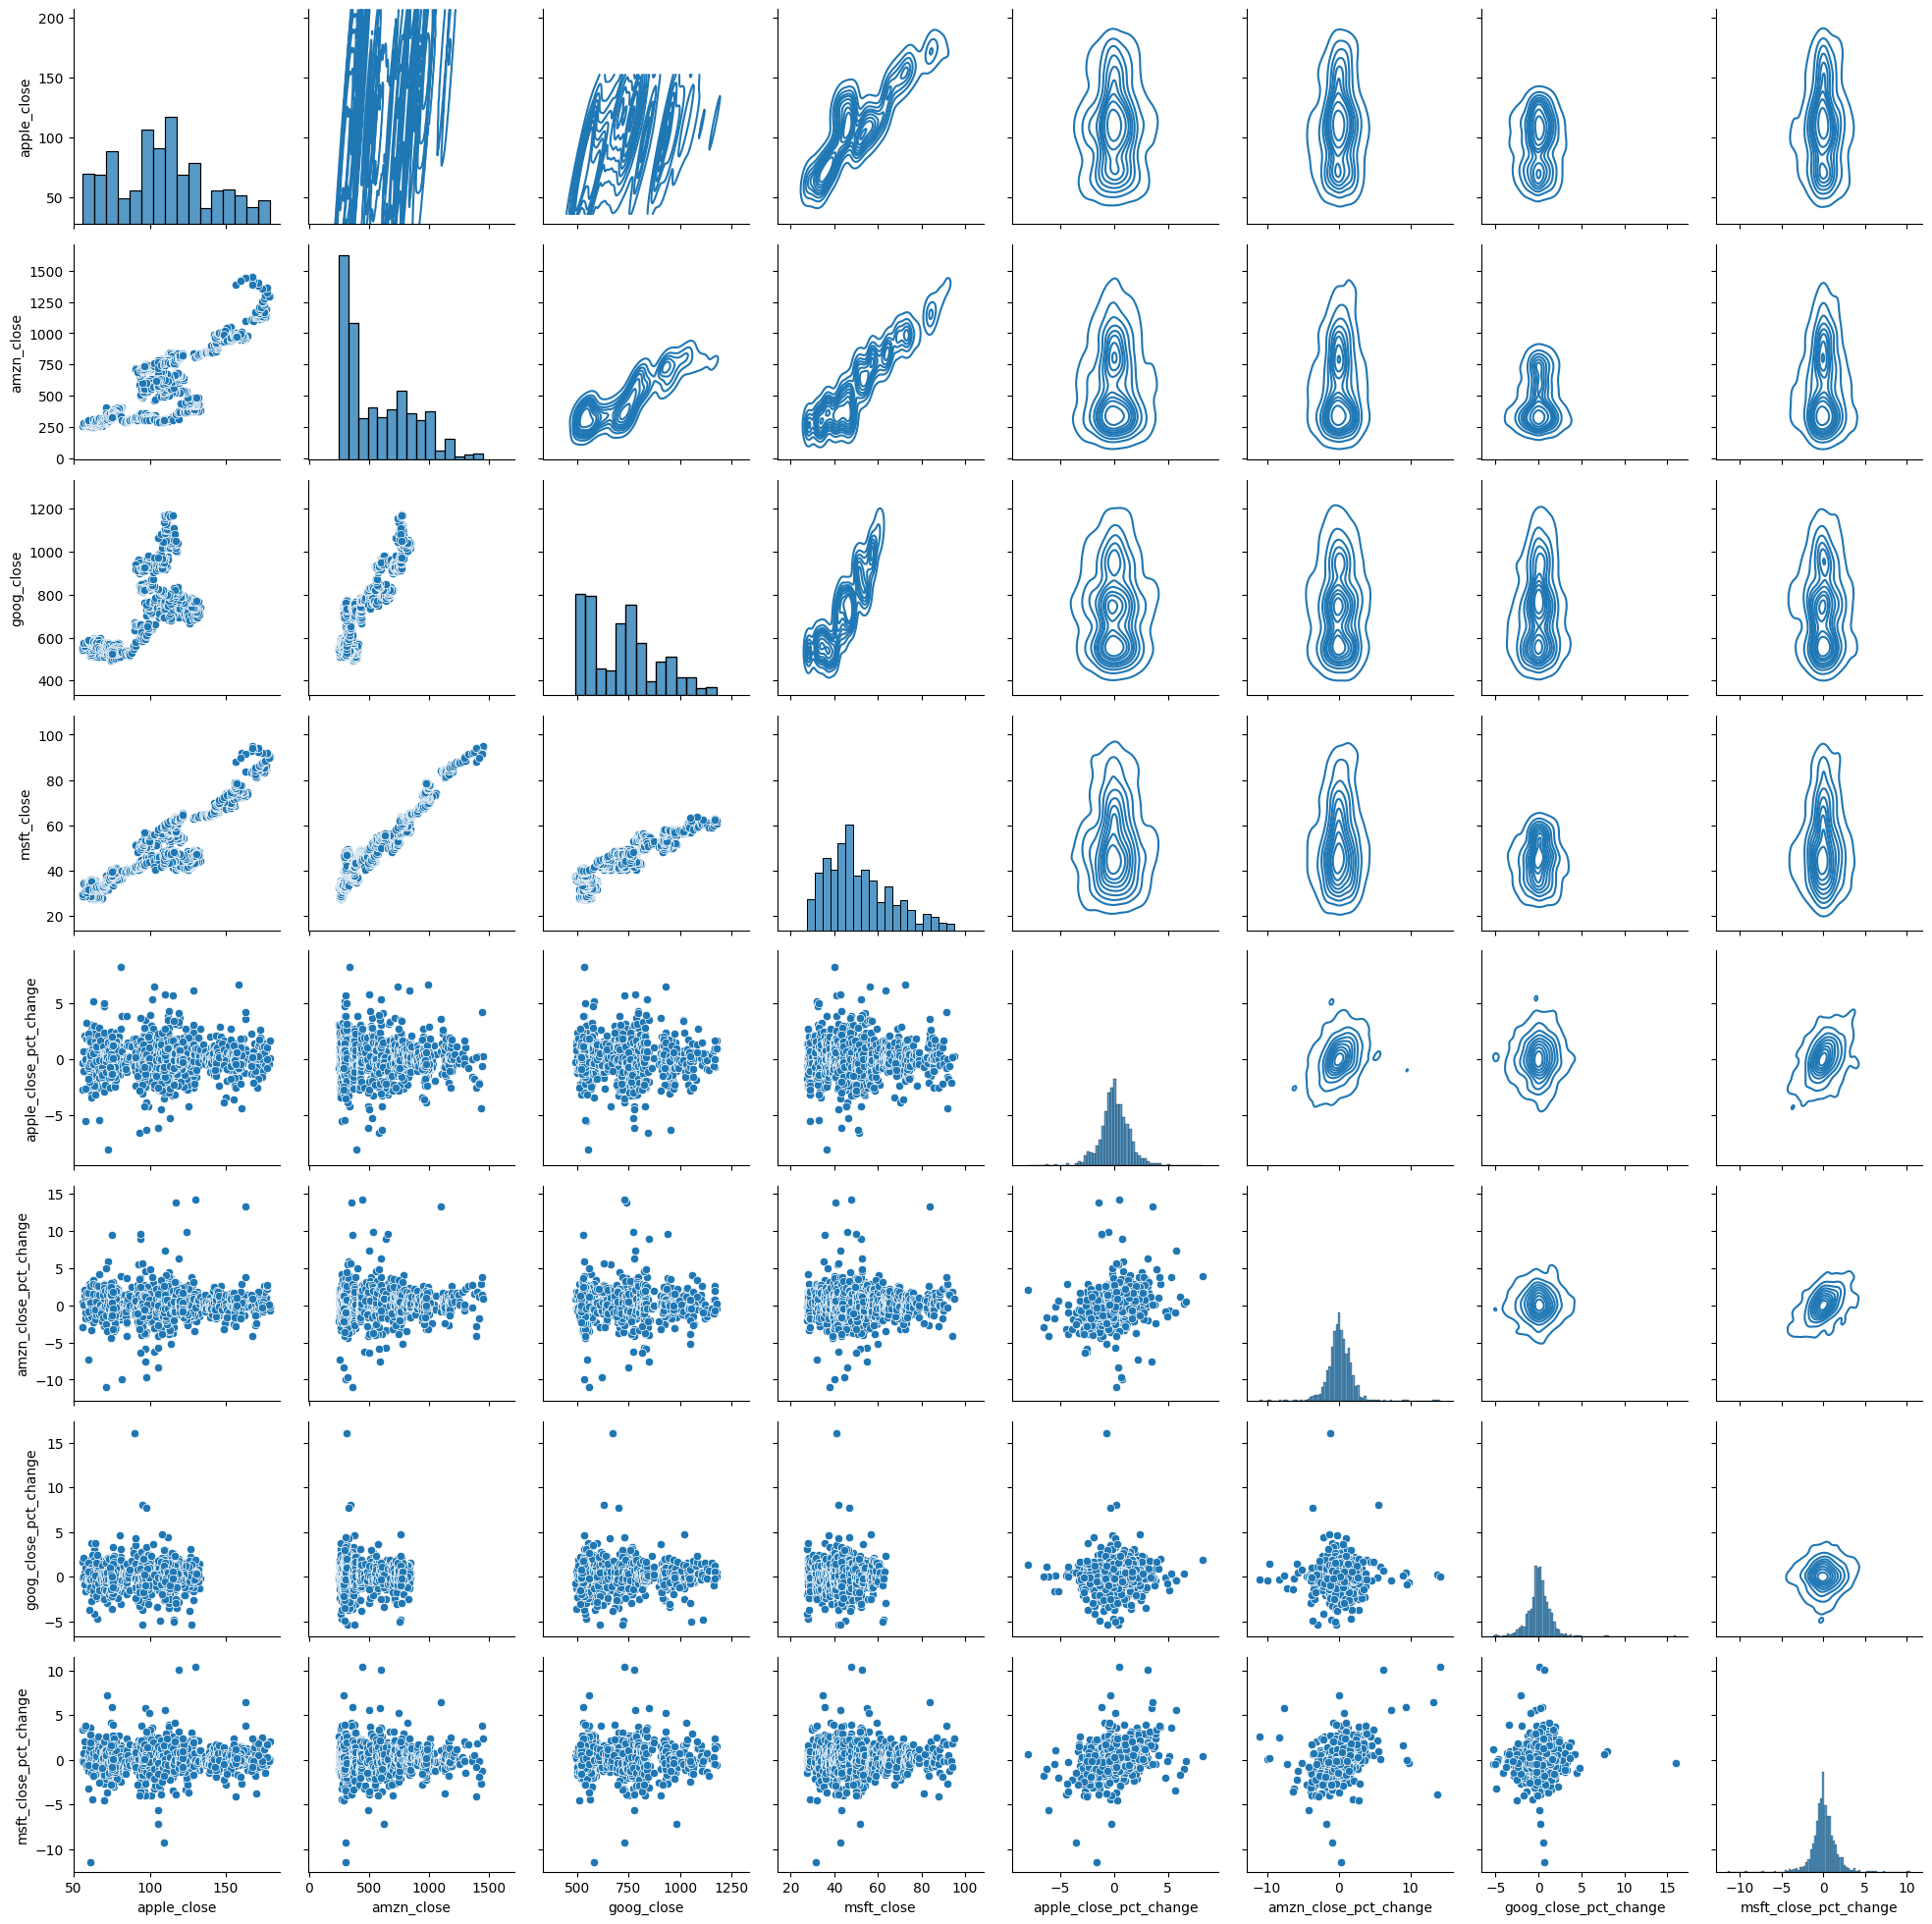

In [44]:
import seaborn as sns

# Create a PairGrid for the daily percentage changes
g = sns.PairGrid(data=closing_price)
g.map_diag(sns.histplot)      # Histogram on the diagonal
g.map_lower(sns.scatterplot)  # Scatter plot in the lower triangle
g.map_upper(sns.kdeplot)      # KDE plot in the upper triangle

#### 7.3 Analyzing the Correlation Matrix

Finally, we compute the correlation matrix for the daily percentage changes to quantify the strength of the relationships between different stocks' daily returns.

In [45]:
# Compute the correlation matrix
correlation_matrix_daily_returns = closing_price.corr()

In [46]:
# Display the correlation matrix
correlation_matrix_daily_returns

,apple_close,amzn_close,goog_close,msft_close,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
apple_close,1.000000,0.819078,0.640522,0.899689,0.020860,0.047844,0.018360,0.013390
amzn_close,0.819078,1.000000,0.888456,0.955977,-0.008885,0.042788,0.009506,0.019454
goog_close,0.640522,0.888456,1.000000,0.907011,-0.014322,0.012400,0.041913,-0.009820
msft_close,0.899689,0.955977,0.907011,1.000000,0.005060,0.031194,0.028833,0.028225
apple_close_pct_change,0.020860,-0.008885,-0.014322,0.005060,1.000000,0.287659,0.036202,0.366598
amzn_close_pct_change,0.047844,0.042788,0.012400,0.031194,0.287659,1.000000,0.027698,0.402678
goog_close_pct_change,0.018360,0.009506,0.041913,0.028833,0.036202,0.027698,1.000000,0.038939
msft_close_pct_change,0.013390,0.019454,-0.009820,0.028225,0.366598,0.402678,0.038939,1.000000


#### 7.4 Conclusions

From the PairGrid and correlation matrix, we draw the following conclusions:

- **Linear Relationships:** The PairGrid indicates that there is a noticeable linear relationship between the daily percentage changes of Apple (AAPL) and Amazon (AMZN) to some extent. This suggests that these stocks' daily movements may be somewhat related.

- **Correlation Values:** The correlation matrix provides exact values showing how strongly the daily returns of each pair of stocks are related.
